<a href="https://colab.research.google.com/github/mahesh146/AI_Proj/blob/main/classify_cure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE PROBLEM & GOAL

**Problem:**

Once upon a time, in a far-off land, there lived a beautiful princess who had fallen gravely ill. The king and queen of the land tried everything in their power to cure her, but none of the remedies they tried seemed to work.

A group of local villagers approached the king and queen and told them about a set of magical ingredients that were said to have the power to cure any ailment. However, the villagers warned that these ingredients could be volatile in their effects, in addition, due to the recent droughts, only so many of the ingredients may be available at any given time, and only a skilled alchemist would be able to determine if a specific combination of these particularly volatile and scarce ingredients would to cure the princess.

The king and queen were desperate to save their daughter, so they set out to find the best alchemist in the land. They searched high and low and finally found an alchemist who had a reputation for being a master of a new magical art known as "Data Science and Machine Learning"

The alchemist first examined the claims of the villagers and the amounts they had taken of each ingredient, along with whether or not it had led to a cure. The alchemist knew that this was their one shot at curing the princess, and they had to get it right.

**Goal:**
- We will be trying to determine how accurate we will be with consistency with given sets of ingredients, as mentioned they are volatile and scarce so we need to be ready for different combinations to be available at any given time.
- These ingredients (features we will use to predict) are as follows:
  - Phoenix Feather
  - Unicorn Horn
  - Dragon's Blood
  - Mermaid Tears
  - Fairy Dust
  - Goblin Toes
  - Witch's Brew
  - Griffin Claw
  - Troll Hair
  - Kraken Ink
  - Minotaur Horn
  - Basellisk Scale
  - Chimera Fang
  
  
- Which will let us determine the target variable which is:
  - Cured (whether the ingredients and quantity combination lead to a cure)

# OUTLINE FOR NOTEBOOK

**Problem Type:**

Classification (Binary)



#PHASE-1


In [82]:
#importing libraries

import pandas as pd
import numpy as np
#from scipy import stats
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
#from sklearn.utils import shuffle

# Visuals
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import missingno as msno
# Warnigs ignore
import warnings
warnings.filterwarnings("ignore")

# A) LOAD DATA

In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
!pwd

/content


In [85]:
df =pd.read_csv("/content/drive/My Drive/datasets/data.csv")

#Gaining insights from data

In [86]:
# Print the ammount of rows and columns in the dataframe
print("[SHAPE BREAKDOWN]\n{} rows and {} columns".format(df.shape[0], df.shape[1]))

[SHAPE BREAKDOWN]
2338 rows and 14 columns


In [87]:
# Show the names of each column in the dataframe
print("\n[COLUMN BREAKDOWN]")
print(df.columns)


[COLUMN BREAKDOWN]
Index(['Phoenix Feather', 'Unicorn Horn', 'Dragon's Blood', 'Mermaid Tears',
       'Fairy Dust', 'Goblin Toes', 'Witch's Brew', 'Griffin Claw',
       'Troll Hair', 'Kraken Ink', 'Minotaur Horn', 'Basilisk Scale',
       'Chimera Fang', 'Cured'],
      dtype='object')


In [88]:
# Look for missing values in the dataframe
#print("[PRE FILLING]\n Total missing values is {}".format(df.isnull().sum().sum()))
#print("\n[PRE FILLING]\n Missing values by column is as follows:")
df.isnull().sum()

Phoenix Feather    0
Unicorn Horn       0
Dragon's Blood     0
Mermaid Tears      0
Fairy Dust         0
Goblin Toes        0
Witch's Brew       0
Griffin Claw       0
Troll Hair         0
Kraken Ink         0
Minotaur Horn      0
Basilisk Scale     0
Chimera Fang       0
Cured              0
dtype: int64

In [89]:
# Print the first 10 rows of the dataframe
print("\n[FIRST 10 ROWS PREVIEW]")
df.head(10)


[FIRST 10 ROWS PREVIEW]


,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
0,2.4,18.7,18.4,27.9,7.9,9.6,18.3,13.2,2.5,26.0,10.5,26.2,12.5,0
1,2.1,6.0,15.0,13.3,15.6,13.1,11.0,5.0,7.2,26.0,1.5,13.3,6.2,0
2,17.2,13.9,23.8,6.8,10.7,15.8,19.4,2.7,15.4,21.2,11.1,16.6,11.4,1
3,8.4,9.7,6.8,26.9,4.6,29.1,14.6,19.7,18.0,20.8,13.6,13.9,8.1,1
4,22.1,10.8,16.4,10.5,22.0,23.4,2.6,18.2,23.8,11.3,5.5,16.8,16.2,0
5,21.9,5.5,11.5,5.0,27.9,20.9,20.5,22.7,33.9,7.4,3.6,38.4,5.2,1
6,30.0,8.6,29.1,26.0,18.6,13.8,3.8,19.1,42.3,17.3,16.8,16.3,4.5,1
7,16.4,12.1,14.2,22.0,15.6,10.4,11.7,18.4,21.0,20.3,4.0,15.7,15.3,0
8,28.4,18.9,30.3,5.6,18.0,9.9,6.2,24.4,14.4,2.7,15.1,41.6,7.0,0
9,11.8,17.7,8.8,22.9,6.1,5.8,15.7,2.6,16.5,23.7,25.2,1.7,1.1,1


<Axes: >

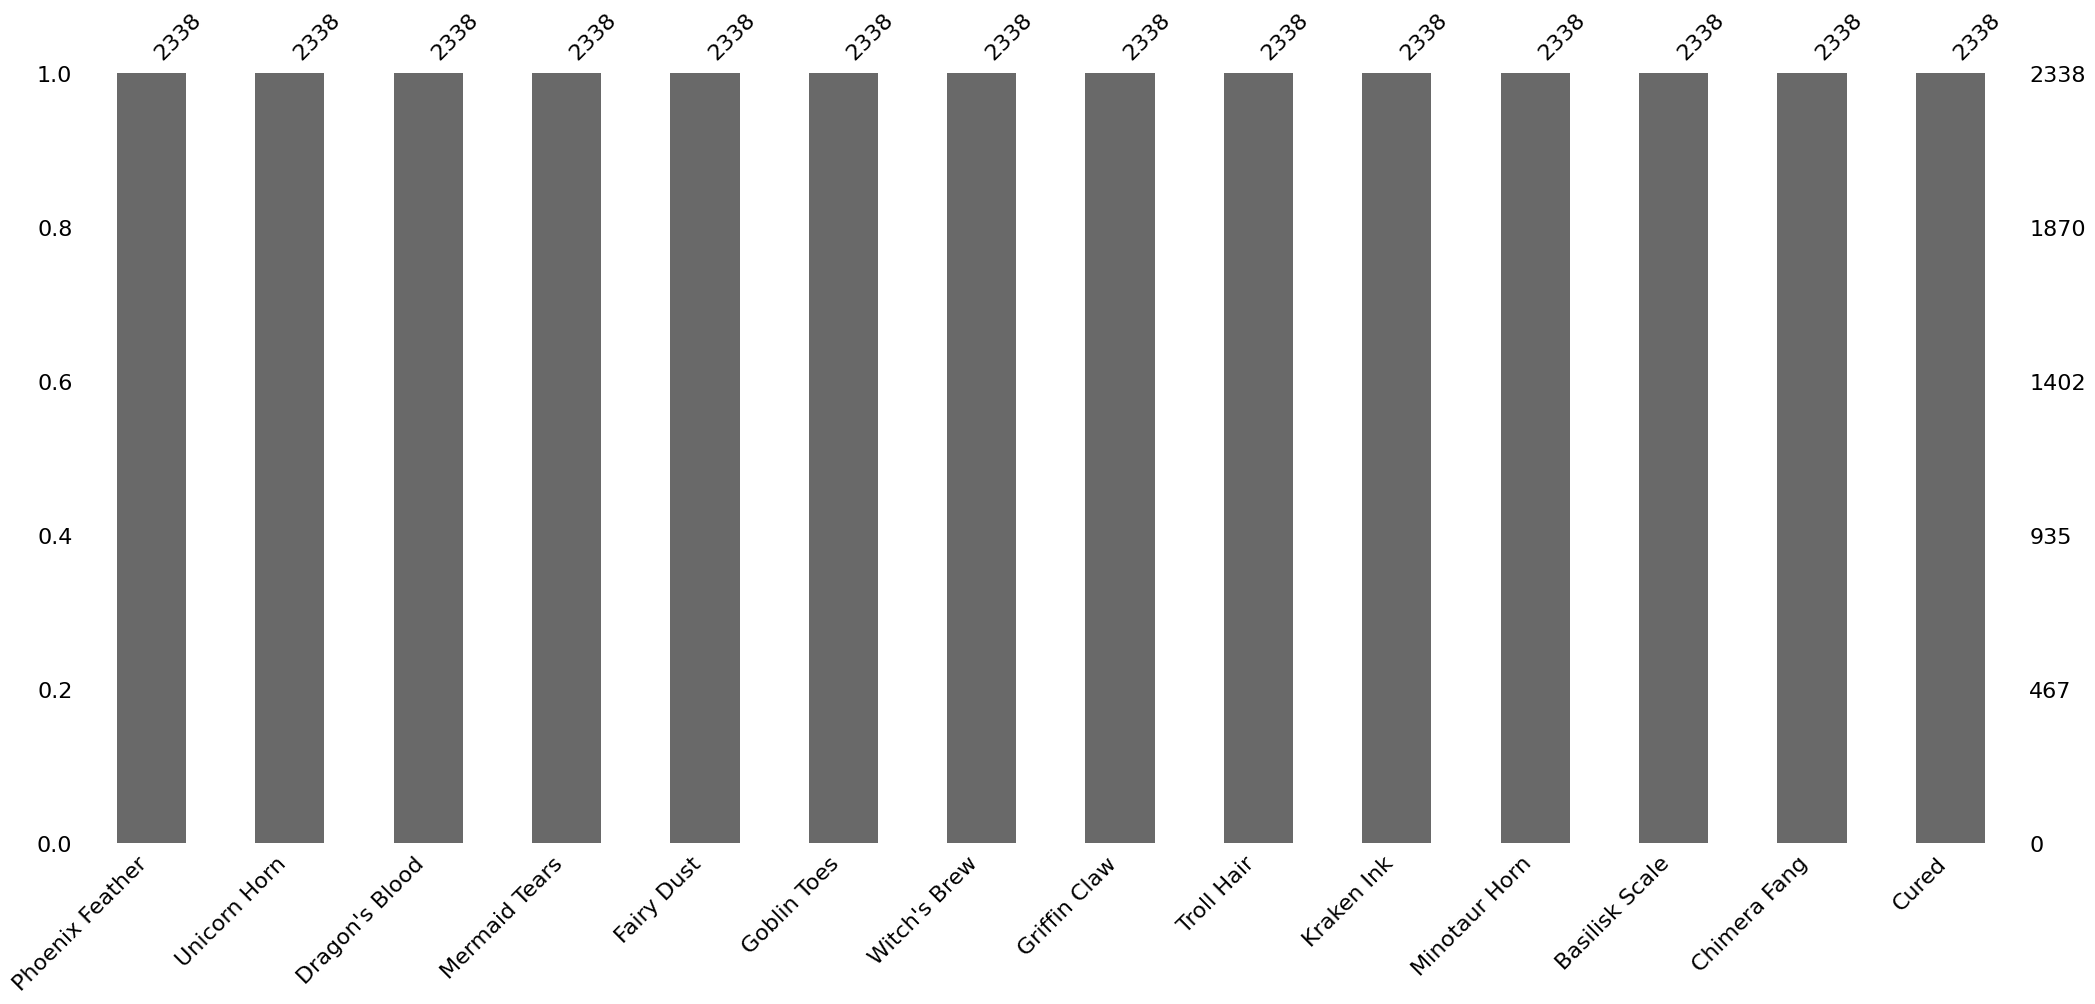

In [90]:
msno.bar(df)

In [91]:
# Show the number of unique values in each column
print("[UNIQUE VALUES PER COLUMN]\n")
df.nunique()

[UNIQUE VALUES PER COLUMN]



Phoenix Feather    362
Unicorn Horn       303
Dragon's Blood     351
Mermaid Tears      321
Fairy Dust         351
Goblin Toes        330
Witch's Brew       329
Griffin Claw       341
Troll Hair         379
Kraken Ink         345
Minotaur Horn      295
Basilisk Scale     364
Chimera Fang       330
Cured                2
dtype: int64

## B)Distribution of each columns

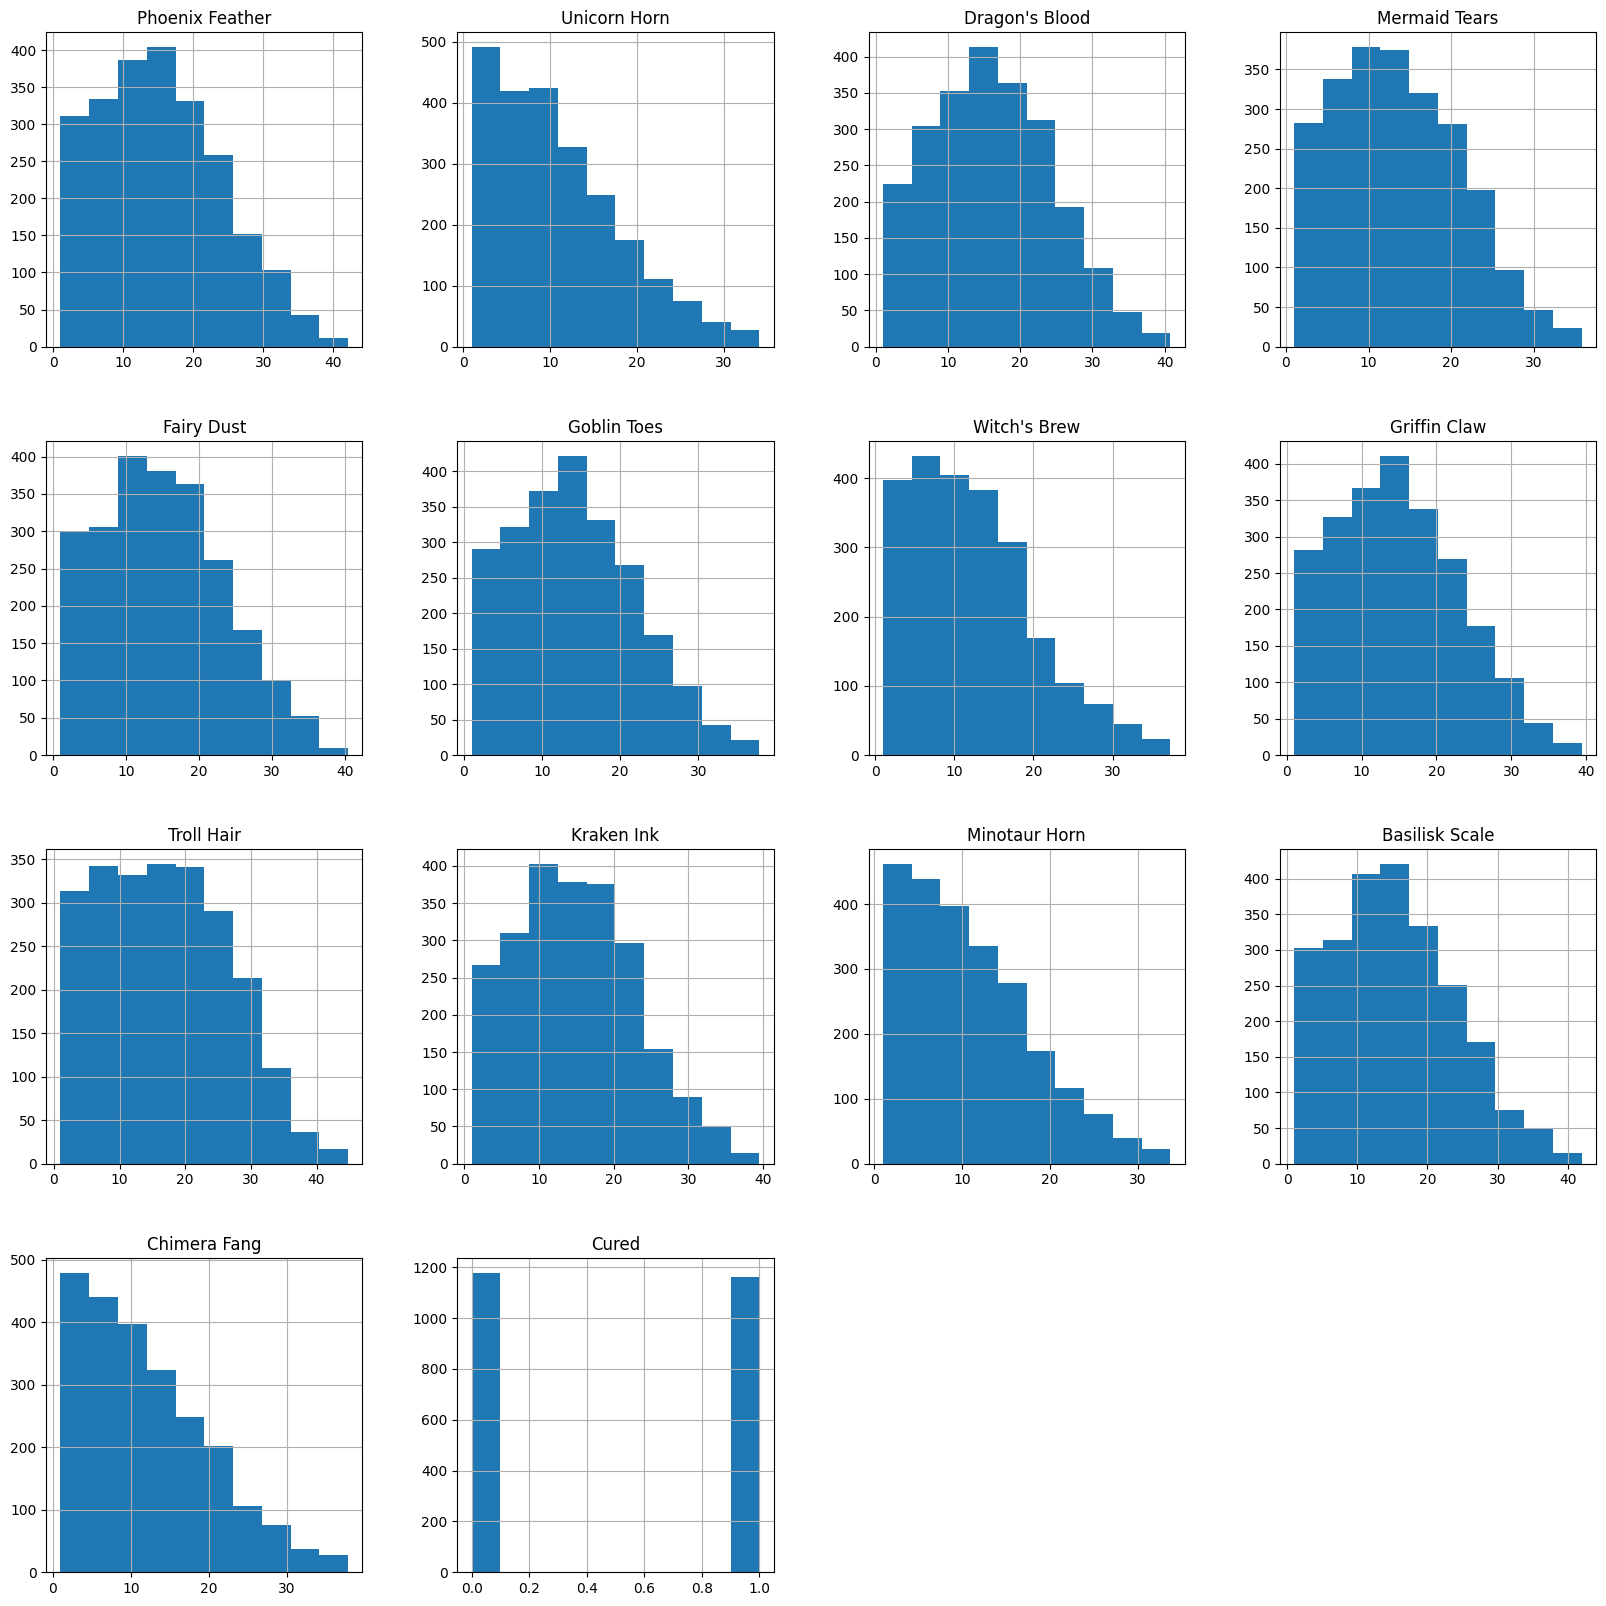

In [92]:
# Show the distribution of values in each column of the dataframe
df.hist(figsize=(20, 20))
plt.show()


<Axes: xlabel='Cured', ylabel='count'>

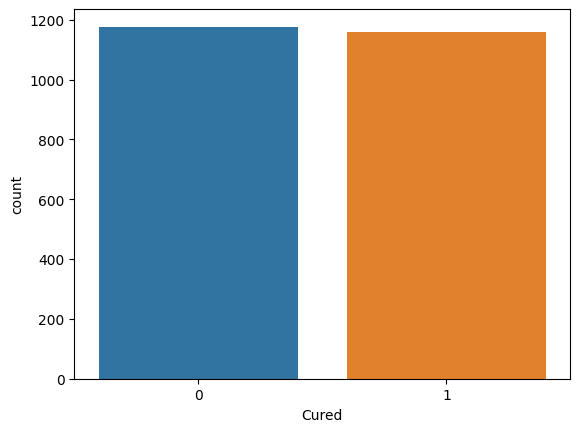

In [93]:
sns.countplot(data = df, x="Cured")

In [94]:
y=df.iloc[:, -1]

counts = y.value_counts()

print("Number of zeros: ", counts[0])
print("Number of ones: ", counts[1])

Number of zeros:  1177
Number of ones:  1161


In [95]:
df.describe()

,Phoenix Feather,Unicorn Horn,Dragon's Blood,Mermaid Tears,Fairy Dust,Goblin Toes,Witch's Brew,Griffin Claw,Troll Hair,Kraken Ink,Minotaur Horn,Basilisk Scale,Chimera Fang,Cured
count,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000,2338.000000
mean,15.365697,10.946749,16.115654,13.627973,15.069504,14.157271,12.328914,14.911206,16.871685,14.890590,10.916125,15.371600,12.084003,0.496578
std,8.669969,7.225162,8.372518,7.545244,8.349340,7.831476,7.709753,8.132678,9.579027,8.014197,7.045195,8.559139,8.047540,0.500095
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.500000,5.300000,9.600000,7.600000,8.625000,7.900000,6.325000,8.400000,8.900000,8.800000,5.200000,8.800000,5.600000,0.000000
50%,14.700000,9.500000,15.800000,13.100000,14.500000,13.500000,11.200000,14.400000,16.300000,14.400000,9.700000,14.800000,10.500000,0.000000
75%,21.300000,15.575000,22.000000,19.000000,20.700000,19.500000,16.900000,20.500000,24.000000,20.400000,15.375000,21.100000,17.275000,1.000000
max,42.100000,34.100000,40.800000,35.800000,40.400000,37.800000,37.300000,39.400000,44.800000,39.500000,33.700000,42.000000,37.800000,1.000000


# Normalize the data

In [96]:
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm = pd.DataFrame(df_norm)

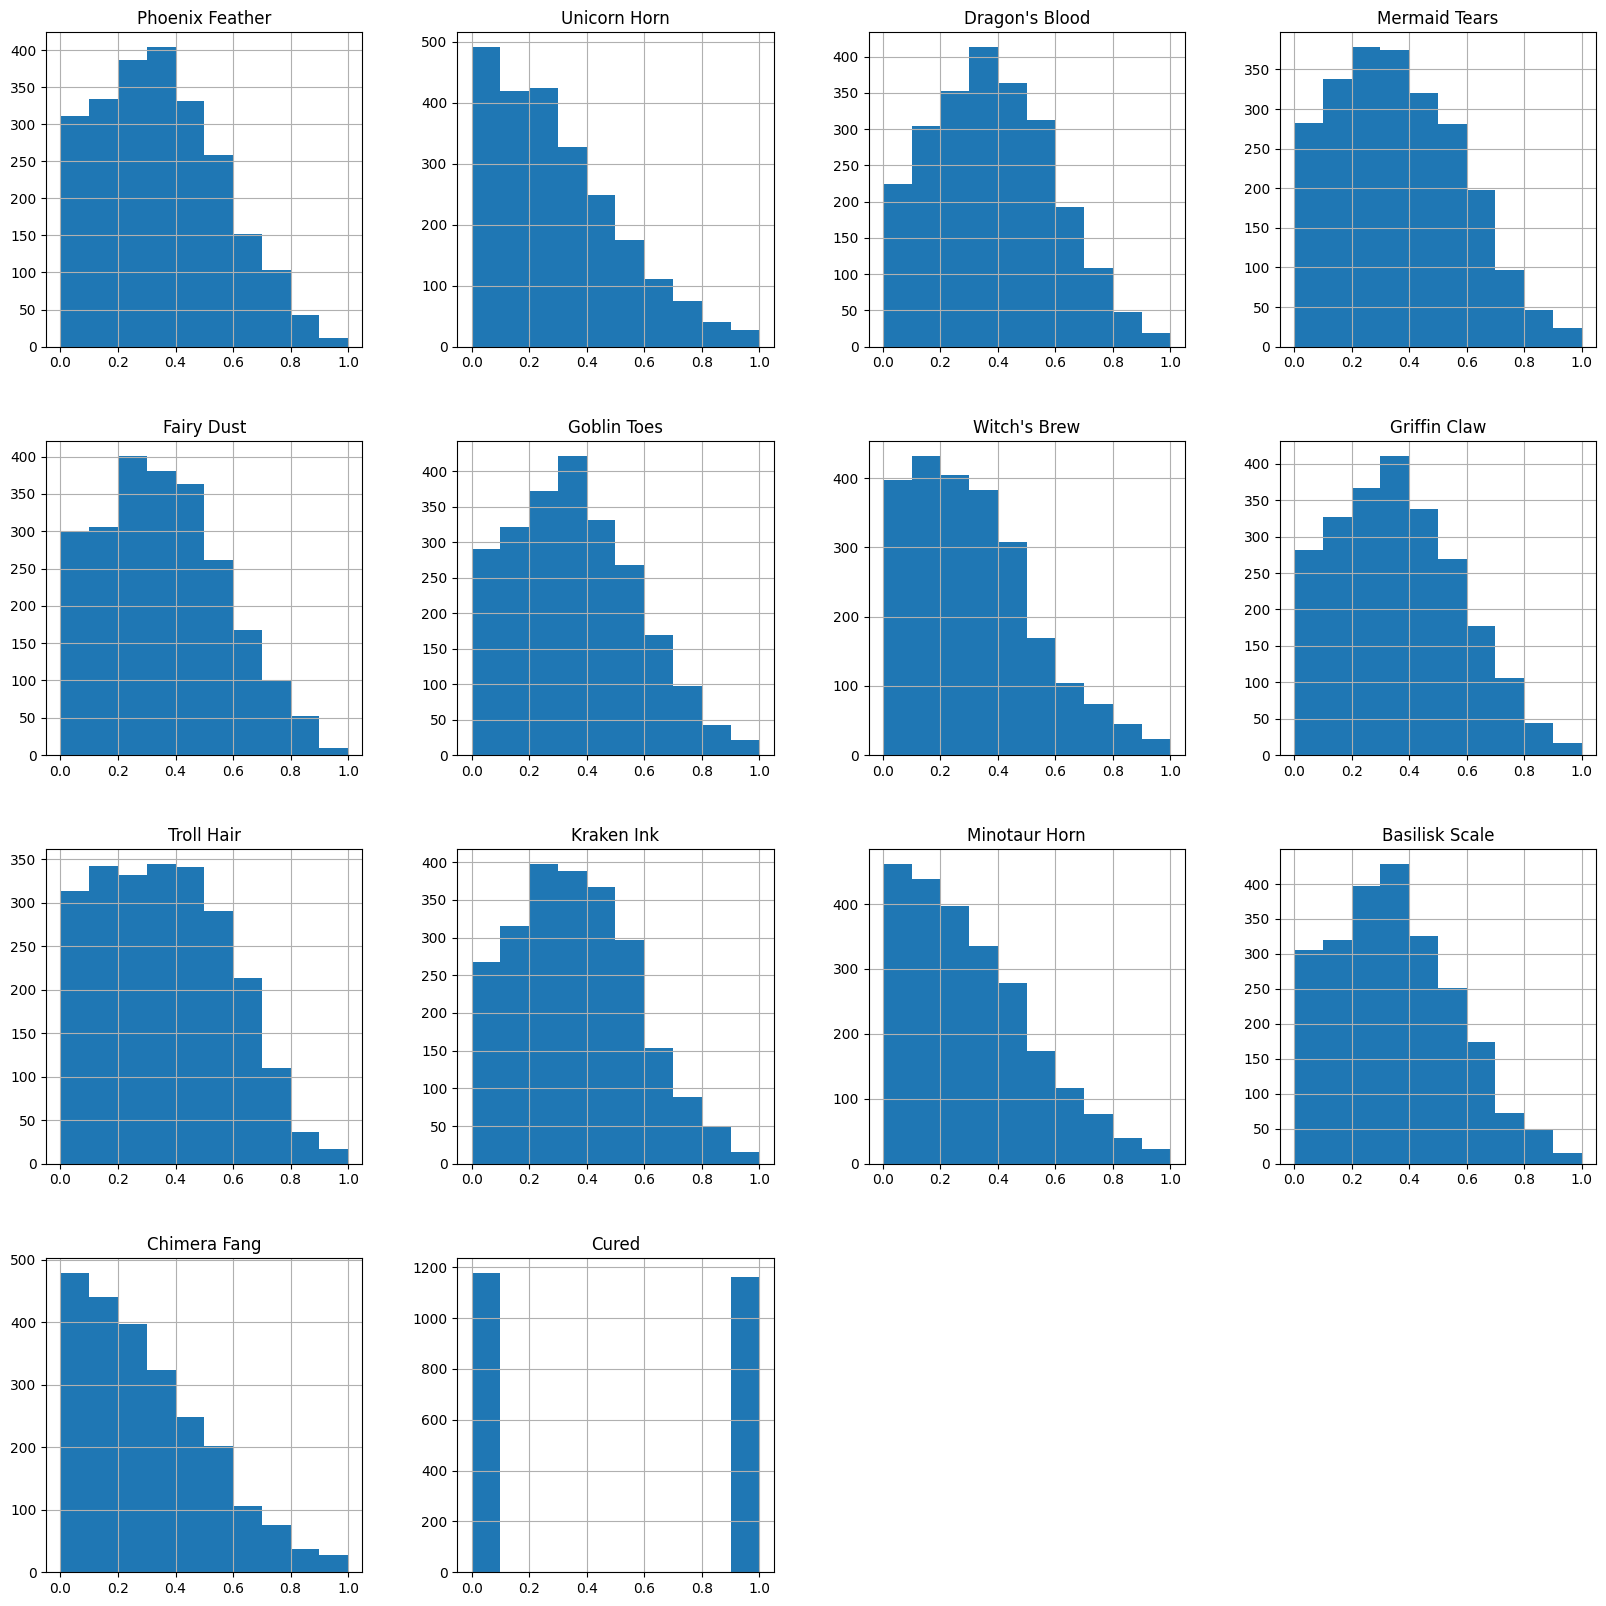

In [97]:
df_norm.hist(figsize=(20, 20))
plt.show()

**PHASE 2:
OVERFITTING OF DATA**

In [98]:
# Split the data into features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print(X)
print(y)


[[ 2.4 18.7 18.4 ... 10.5 26.2 12.5]
 [ 2.1  6.  15.  ...  1.5 13.3  6.2]
 [17.2 13.9 23.8 ... 11.1 16.6 11.4]
 ...
 [15.2 33.2  7.2 ...  3.9 18.  19.2]
 [ 2.  17.  33.2 ... 15.7 20.5  2.1]
 [ 6.2  2.6 11.7 ...  3.6 21.8  2.5]]
[0 0 1 ... 1 1 1]


#Model Building with multiple layers and neurons (1) and 50 epochs

In [99]:
# Define the model architecture

model = Sequential()
model.add(Dense(1, input_dim=X.shape[1], activation='sigmoid'))


In [100]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/50
234/234 [==============================] - 1s 2ms/step - loss: 4.7692 - accuracy: 0.5586
Epoch 2/50
234/234 [==============================] - 0s 2ms/step - loss: 3.1550 - accuracy: 0.5830
Epoch 3/50
234/234 [==============================] - 0s 2ms/step - loss: 2.1775 - accuracy: 0.6257
Epoch 4/50
234/234 [==============================] - 0s 2ms/step - loss: 1.4458 - accuracy: 0.6835
Epoch 5/50
234/234 [==============================] - 0s 2ms/step - loss: 0.9879 - accuracy: 0.7344
Epoch 6/50
234/234 [==============================] - 0s 2ms/step - loss: 0.7212 - accuracy: 0.7716
Epoch 7/50
234/234 [==============================] - 0s 2ms/step - loss: 0.5619 - accuracy: 0.8033
Epoch 8/50
234/234 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8328
Epoch 9/50
234/234 [==============================] - 0s 2ms/step - loss: 0.4084 - accuracy: 0.8499
Epoch 10/50
234/234 [==============================] - 0s 2ms/step - loss: 0.3787 - accuracy: 0.8567

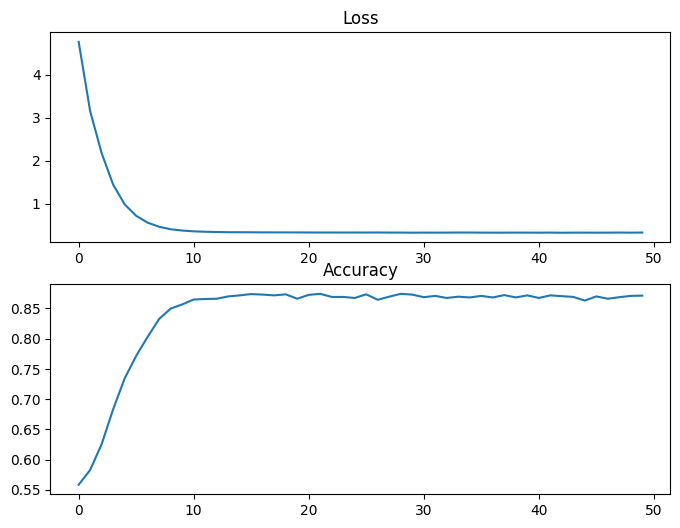

In [101]:
# Train the model for 50 epochs
history = model.fit(X, y, epochs=50, batch_size=10, verbose=1)

# Plot the loss and accuracy over epochs
fig, axs = plt.subplots(2, figsize=(8, 6))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Accuracy')
plt.show()

#Model Building with multiple layers having input layer as 2, output as 1 and 80 epochs

In [ ]:
# Define the model architecture

model = Sequential()
model.add(Dense(2, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8721
Epoch 2/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8730
Epoch 3/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3307 - accuracy: 0.8691
Epoch 4/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8704
Epoch 5/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3306 - accuracy: 0.8670
Epoch 6/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3287 - accuracy: 0.8670
Epoch 7/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3295 - accuracy: 0.8725
Epoch 8/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3317 - accuracy: 0.8751
Epoch 9/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8713
Epoch 10/100
234/234 [==============================] - 0s 2ms/step - loss: 0.3278 - accura

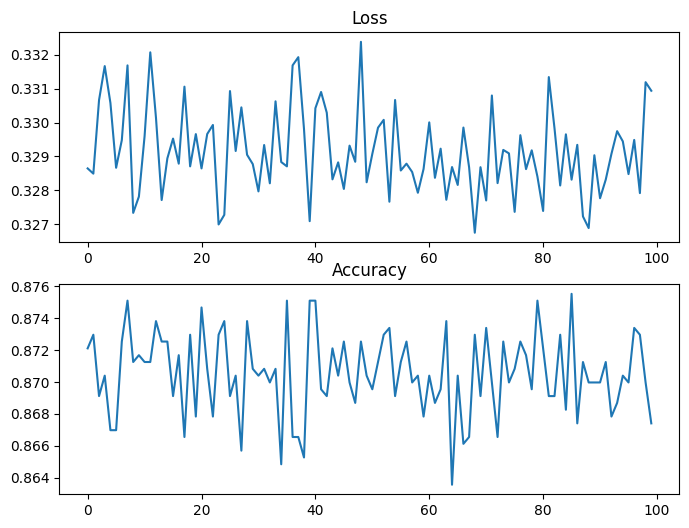

In [102]:
# Train the model for 80 epochs
history = model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Plot the loss and accuracy over epochs
fig, axs = plt.subplots(2, figsize=(8, 6))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Accuracy')
plt.show()

#Model Building with multiple layers having input layer as 16,hidden layer as 8 and output as 1 and 300 epochs

In [108]:
# Define a larger neural network with 16 neurons in the input layer, 8 neurons in the hidden layer, and 1 neuron in the output layer
# Define the model architecture

model = Sequential()
model.add(Dense(16, input_dim=X.shape[1], activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [110]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Epoch 1/300
234/234 [==============================] - 1s 2ms/step - loss: 0.6905 - accuracy: 0.5376
Epoch 2/300
234/234 [==============================] - 1s 3ms/step - loss: 0.6513 - accuracy: 0.6420
Epoch 3/300
234/234 [==============================] - 1s 3ms/step - loss: 0.6002 - accuracy: 0.7044
Epoch 4/300
234/234 [==============================] - 1s 3ms/step - loss: 0.5170 - accuracy: 0.7776
Epoch 5/300
234/234 [==============================] - 1s 3ms/step - loss: 0.4436 - accuracy: 0.8148
Epoch 6/300
234/234 [==============================] - 1s 3ms/step - loss: 0.4002 - accuracy: 0.8413
Epoch 7/300
234/234 [==============================] - 1s 3ms/step - loss: 0.3738 - accuracy: 0.8567
Epoch 8/300
234/234 [==============================] - 1s 3ms/step - loss: 0.3566 - accuracy: 0.8589
Epoch 9/300
234/234 [==============================] - 1s 2ms/step - loss: 0.3398 - accuracy: 0.8717
Epoch 10/300
234/234 [==============================] - 0s 2ms/step - loss: 0.3270 - accura

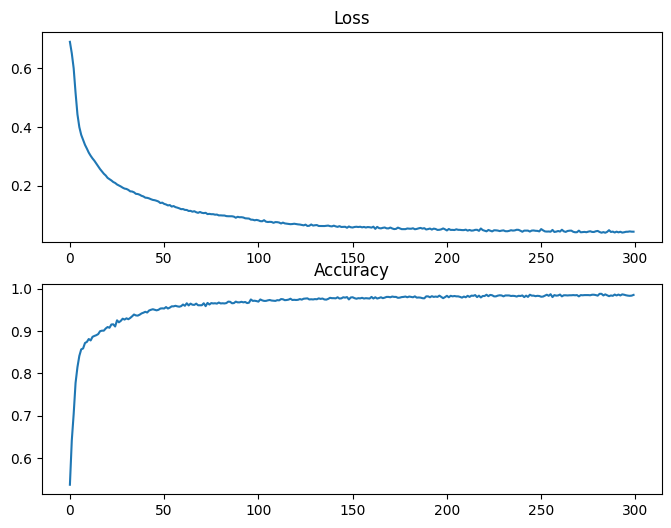

In [111]:
# Train the model for 50 epochs
history = model.fit(X, y, epochs=300, batch_size=10, verbose=1)

# Plot the loss and accuracy over epochs
fig, axs = plt.subplots(2, figsize=(8, 6))
axs[0].plot(history.history['loss'])
axs[0].set_title('Loss')
axs[1].plot(history.history['accuracy'])
axs[1].set_title('Accuracy')
plt.show()

#Phase-3

In [114]:
# Shuffle the data

data= df.sample(frac=1).reset_index(drop=True)


In [115]:
#Splitting the data
train_data = df.iloc[:int(0.7 * len(df))]
val_data = df.iloc[int(0.7 * len(df)):]

XTRAIN = train_data.iloc[:, :-1]
YTRAIN = train_data.iloc[:, -1]
XVALID = val_data.iloc[:, :-1]
YVALID = val_data.iloc[:, -1]

In [116]:
# Define the model
model = Sequential()
model.add(Dense(16,activation='relu',input_shape=(13,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [117]:
# Set up model checkpointing

checkpoint_path = "model_checkpoints/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
# Fit the model on the training set
history = model.fit(XTRAIN, YTRAIN, epochs=250, batch_size=32, verbose=1, validation_data=(XVALID, YVALID), callbacks=[cp_callback])

Epoch 1/250
24/52 [============>.................] - ETA: 0s - loss: 9.0883 - accuracy: 0.5143   
Epoch 1: saving model to model_checkpoints/cp.ckpt
52/52 [==============================] - 2s 8ms/step - loss: 6.3778 - accuracy: 0.4548 - val_loss: 2.5391 - val_accuracy: 0.3533
Epoch 2/250
30/52 [================>.............] - ETA: 0s - loss: 2.0120 - accuracy: 0.3854
Epoch 2: saving model to model_checkpoints/cp.ckpt
52/52 [==============================] - 0s 4ms/step - loss: 1.8190 - accuracy: 0.3857 - val_loss: 1.3852 - val_accuracy: 0.4117
Epoch 3/250
50/52 [===========================>..] - ETA: 0s - loss: 1.1593 - accuracy: 0.4325
Epoch 3: saving model to model_checkpoints/cp.ckpt
52/52 [==============================] - 0s 4ms/step - loss: 1.1541 - accuracy: 0.4322 - val_loss: 0.9022 - val_accuracy: 0.4900
Epoch 4/250
48/52 [==========================>...] - ETA: 0s - loss: 0.7888 - accuracy: 0.5566
Epoch 4: saving model to model_checkpoints/cp.ckpt
52/52 [===================

In [123]:
# Load the best model weights
model.load_weights(checkpoint_path)

52/52 [==============================] - 0s 2ms/step
Training accuracy: 100.00%, precision: 100.00%, recall: 100.00%, f1-score: 100.00%


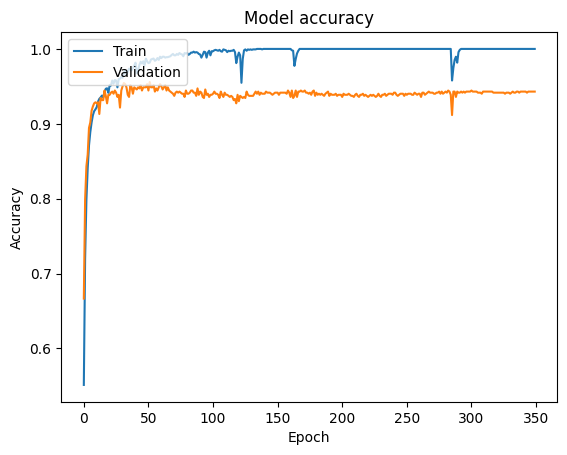

In [126]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(XTRAIN, YTRAIN, verbose=0)
train_pred = np.round(model.predict(XTRAIN)).flatten()
# Calculate other metrics besides accuracy
train_precision = precision_score(YTRAIN, train_pred, zero_division=0)
train_recall = recall_score(YTRAIN, train_pred, zero_division=0)
train_f1_score = f1_score(YTRAIN, train_pred, zero_division=0)
print(f'Training accuracy: {train_acc:.2%}, precision: {train_precision:.2%}, recall: {train_recall:.2%}, f1-score: {train_f1_score:.2%}')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



22/22 [==============================] - 0s 1ms/step
Validation accuracy: 94.30%, precision: 93.20%, recall: 95.36%, f1-score: 94.27%


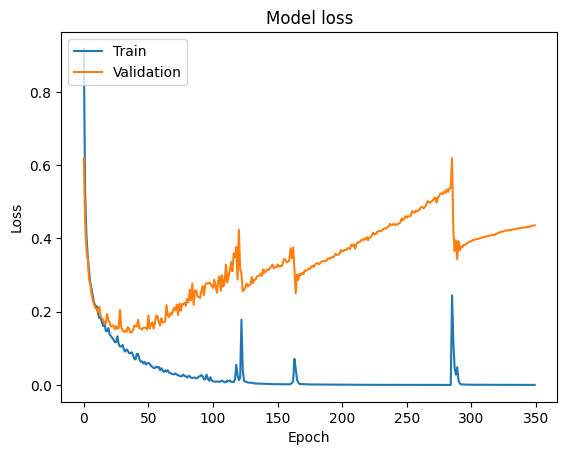

In [125]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(XVALID, YVALID, verbose=0)
val_pred = np.round(model.predict(XVALID)).flatten()
# Calculate other metrics besides accuracy
val_precision = precision_score(YVALID, val_pred, zero_division=0)
val_recall = recall_score(YVALID, val_pred, zero_division=0)
val_f1_score = f1_score(YVALID, val_pred, zero_division=0)
print(f'Validation accuracy: {val_acc:.2%}, precision: {val_precision:.2%}, recall: {val_recall:.2%}, f1-score: {val_f1_score:.2%}')


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

#model 2

In [121]:
model = Sequential()

model.add(Dense(32,activation='relu',input_shape=(13,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [122]:
# Set up model checkpointing

checkpoint_path = "model_checkpoints/cp.ckpt"
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, save_weights_only=True, verbose=1)
# Fit the model on the training set
history = model.fit(XTRAIN, YTRAIN, epochs=350, batch_size=32, verbose=1, validation_data=(XVALID, YVALID), callbacks=[cp_callback])

Epoch 1/350
26/52 [==============>...............] - ETA: 0s - loss: 1.1022 - accuracy: 0.5240  
Epoch 1: saving model to model_checkpoints/cp.ckpt
52/52 [==============================] - 3s 7ms/step - loss: 0.9174 - accuracy: 0.5513 - val_loss: 0.6185 - val_accuracy: 0.6667
Epoch 2/350
45/52 [========================>.....] - ETA: 0s - loss: 0.5389 - accuracy: 0.7125
Epoch 2: saving model to model_checkpoints/cp.ckpt
52/52 [==============================] - 0s 5ms/step - loss: 0.5284 - accuracy: 0.7200 - val_loss: 0.4466 - val_accuracy: 0.7991
Epoch 3/350
43/52 [=======================>......] - ETA: 0s - loss: 0.4213 - accuracy: 0.7914
Epoch 3: saving model to model_checkpoints/cp.ckpt
52/52 [==============================] - 0s 7ms/step - loss: 0.4108 - accuracy: 0.7983 - val_loss: 0.3699 - val_accuracy: 0.8433
Epoch 4/350
35/52 [===================>..........] - ETA: 0s - loss: 0.3642 - accuracy: 0.8339
Epoch 4: saving model to model_checkpoints/cp.ckpt
52/52 [====================

In [127]:
# Load the best model weights
model.load_weights(checkpoint_path)

Training accuracy: 100.00%, precision: 100.00%, recall: 100.00%, f1-score: 100.00%


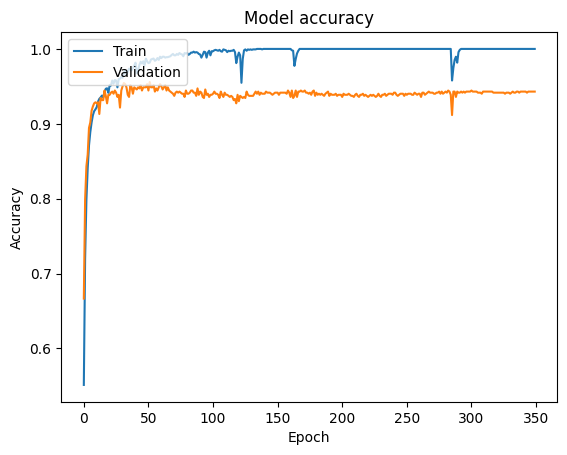

In [128]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(XTRAIN, YTRAIN, verbose=0)
#train_pred = np.round(model.predict(XTRAIN)).flatten()
# Calculate other metrics besides accuracy
train_precision = precision_score(YTRAIN, train_pred, zero_division=0)
train_recall = recall_score(YTRAIN, train_pred, zero_division=0)
train_f1_score = f1_score(YTRAIN, train_pred, zero_division=0)
print(f'Training accuracy: {train_acc:.2%}, precision: {train_precision:.2%}, recall: {train_recall:.2%}, f1-score: {train_f1_score:.2%}')


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

22/22 [==============================] - 0s 2ms/step
Validation accuracy: 94.30%, precision: 93.20%, recall: 95.36%, f1-score: 94.27%


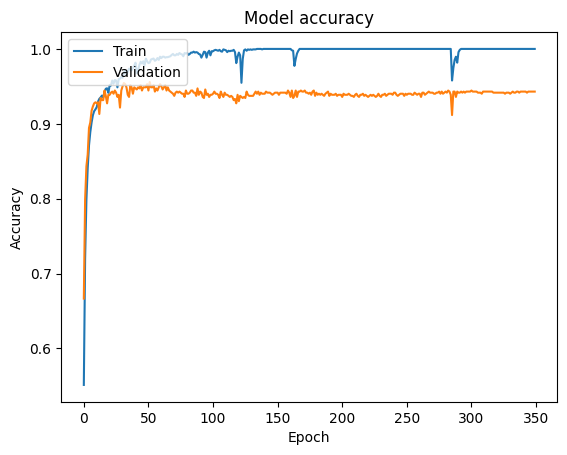

In [129]:
# Evaluate the model on the validation set
val_loss, val_acc = model.evaluate(XVALID, YVALID, verbose=0)

val_pred = np.round(model.predict(XVALID)).flatten()
#print(val_pred)
# Calculate other metrics besides accuracy
val_precision = precision_score(YVALID, val_pred, zero_division=0)
val_recall = recall_score(YVALID, val_pred, zero_division=0)
val_f1_score = f1_score(YVALID, val_pred, zero_division=0)
print(f'Validation accuracy: {val_acc:.2%}, precision: {val_precision:.2%}, recall: {val_recall:.2%}, f1-score: {val_f1_score:.2%}')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


#Phase-4

In [130]:


# Train models on individual features and plot validation accuracies
individual_accuracies = []
for i in range(XTRAIN.shape[1]):
    X_train_single = XTRAIN.iloc[:, i].values.reshape(-1, 1)
    X_val_single = XVALID.iloc[:, i].values.reshape(-1, 1)

    # Train a model with a single feature
    single_feature_model = Sequential()
    single_feature_model.add(Dense(1, input_dim=1, activation='sigmoid'))
    single_feature_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    single_feature_model.fit(X_train_single,epochs=30, batch_size=32, verbose=1)

    # Calculate validation accuracy
    val_probabilities_single = single_feature_model.predict(X_val_single)
    val_predictions_single = (val_probabilities_single > 0.5).astype('int32')
    val_accuracy_single = custom_accuracy(y_val, val_predictions_single)
    individual_accuracies.append(val_accuracy_single)

# Plot the validation accuracies
plt.bar(range(len(individual_accuracies)), individual_accuracies)
plt.xlabel('Feature Index')
plt.ylabel('Validation Accuracy')
plt.ylim(0.8, 1)
plt.title('Validation Accuracies for Individual Features')
plt.show()

# Find the feature importance ranking
feature_importance = np.argsort(individual_accuracies)[::-1]

# Train models without unimportant features and plot validation accuracies
reduced_accuracies = []
for i in range(1, len(feature_importance)):
    important_features = feature_importance[:i]
    X_train_reduced = X_train.iloc[:, important_features]
    X_val_reduced = X_val.iloc[:, important_features]

    # Train a model with reduced features
    reduced_model = Sequential()
    reduced_model.add(Dense(16, input_dim=X_train_reduced.shape[1], activation='relu'))
    reduced_model.add(Dense(8, activation='relu'))
    reduced_model.add(Dense(1, activation='sigmoid'))
    reduced_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    reduced_model.fit(X_train_reduced, YTEST, epochs=30, batch_size=32, verbose=1)

    # Calculate validation accuracy
    val_probabilities_reduced = reduced_model.predict(X_val_reduced)
    val_predictions_reduced = (val_probabilities_reduced > 0.5).astype('int32')
    val_accuracy_reduced = custom_accuracy(y_val, val_predictions_reduced)
    reduced_accuracies.append(val_accuracy_reduced)

# Plot the validation accuracies for reduced models
plt.plot(range(1, len(reduced_accuracies) + 1), reduced_accuracies)
plt.xlabel('Number of Features Removed')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracies for Feature-Reduced Models')
plt.show()

# Compare original model accuracy with feature-reduced model accuracy
print("Original model validation accuracy:", val_accuracy)
print("Best feature-reduced model validation accuracy:", max(reduced_accuracies))

Epoch 1/30


ValueError: ignored